
1. **Can we use Bagging for regression problems?**

-> Yes, Bagging can be used for regression by combining the predictions of multiple regressors, typically using the average of their outputs. A common example is the Bagging Regressor.

2. **What is the difference between multiple model training and single model training?**
->  Multiple model training (like ensemble methods) uses several models to improve performance and reduce variance or bias. Single model training relies on just one model, which may be more prone to overfitting or underfitting.

3. **Explain the concept of feature randomness in Random Forest.**
-> Feature randomness refers to selecting a random subset of features at each split in decision trees within a Random Forest. This increases diversity among the trees and reduces correlation, leading to better generalization.

4. **What is OOB (Out-of-Bag) Score?**
->   The OOB score is an internal validation score used in Bagging-based models like Random Forest, calculated using data not included in the bootstrap sample. It provides an unbiased estimate of model performance without needing a separate validation set.

5. **How can you measure the importance of features in a Random Forest model?**
-> Feature importance is measured by evaluating the decrease in impurity (like Gini or entropy) or using permutation importance, which assesses the effect of shuffling a feature on model accuracy.

6. **Explain the working principle of a Bagging Classifier.**
-> A Bagging Classifier builds multiple models on different bootstrap samples of the training data and aggregates their predictions (usually via majority vote for classification). This helps reduce variance and improve stability.

7. **How do you evaluate a Bagging Classifier’s performance?**
-> You can use standard classification metrics like accuracy, precision, recall, F1-score, or the OOB score. Cross-validation can also be used for a more robust performance estimate.

8. **How does a Bagging Regressor work?**
-> A Bagging Regressor trains several base regressors on random bootstrap samples of the dataset and combines their predictions by averaging. This reduces variance and leads to more stable predictions.

9. **What is the main advantage of ensemble techniques?**
-> Ensemble methods combine multiple models to improve prediction accuracy, robustness, and generalization. They help mitigate issues like overfitting and underfitting.

10. **What is the main challenge of ensemble methods?**
-> The main challenges include increased computational cost, complexity, and difficulty in interpretability. Training and maintaining multiple models can also require more resources.

11. **Explain the key idea behind ensemble techniques.**
-> The key idea is to combine predictions from multiple models to improve overall performance. Diverse models working together can correct each other’s errors and provide more accurate results.

12. **What is a Random Forest Classifier?**
-> A Random Forest Classifier is an ensemble of decision trees where each tree is trained on a random subset of data and features. The final prediction is made by aggregating the predictions of all the trees (majority vote for classification).

13. **What are the main types of ensemble techniques?**
-> The main types are Bagging (Bootstrap Aggregating), Boosting, and Stacking. Each technique combines models differently to improve performance.

14. **What is ensemble learning in machine learning?**
-> Ensemble learning involves using multiple models (often called base learners) to solve the same problem and combine their outputs. It aims to enhance model performance by reducing bias and variance.

15. **When should we avoid using ensemble methods?**
-> Avoid ensemble methods when the problem is simple or when interpretability is crucial. They may also be unnecessary for small datasets or where computational resources are limited.

16. **How does Bagging help in reducing overfitting?**
-> Bagging reduces overfitting by averaging predictions from many models trained on different data subsets, which decreases model variance. It prevents any single model from having too much influence.

17. **Why is Random Forest better than a single Decision Tree?**
-> A Random Forest reduces overfitting and improves accuracy by combining predictions from multiple trees trained on different data and features. It is more robust and generalizes better.

18. **What is the role of bootstrap sampling in Bagging?**
-> Bootstrap sampling creates different subsets of the data by sampling with replacement. Each model in the ensemble is trained on a different bootstrap sample, adding diversity.

19. **What are some real-world applications of ensemble techniques?**
-> Ensemble methods are widely used in fraud detection, medical diagnosis, stock price prediction, recommendation systems, and competitions like Kaggle due to their high accuracy and robustness.

20. **What is the difference between Bagging and Boosting?**
-> Bagging trains models independently in parallel and reduces variance, while Boosting trains models sequentially, where each new model corrects the errors of the previous ones, reducing bias.


In [2]:
# Bagging Classifier using Decision Trees on a sample dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=500, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bag_clf.fit(X_train, y_train)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bag_clf.predict(X_test)))

Bagging Classifier Accuracy: 0.94


In [4]:
#  Bagging Regressor with MSE
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))

Bagging Regressor MSE: 3256.961797752809


In [13]:
# Random Forest Classifier feature importance
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print("Feature Importances:", rf_clf.feature_importances_)


Feature Importances: [0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]


In [14]:
# Random Forest Regressor vs Decision Tree
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
dt_reg = DecisionTreeRegressor(random_state=42)

rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)

rf_mse = mean_squared_error(y_test, rf_reg.predict(X_test))
dt_mse = mean_squared_error(y_test, dt_reg.predict(X_test))
print("RF MSE:", rf_mse, "| DT MSE:", dt_mse)

RF MSE: 0.03276140350877193 | DT MSE: 0.05263157894736842


In [15]:
#  OOB Score for Random Forest
rf_oob = RandomForestClassifier(oob_score=True, bootstrap=True, random_state=42)
rf_oob.fit(X_train, y_train)
print("OOB Score:", rf_oob.oob_score_)

OOB Score: 0.9560439560439561


In [16]:
#  Bagging Classifier using SVM
from sklearn.svm import SVC
svc = SVC(probability=True, random_state=42)
bag_svm = BaggingClassifier(estimator=svc, random_state=42)
bag_svm.fit(X_train, y_train)
print("Bagging SVM Accuracy:", accuracy_score(y_test, bag_svm.predict(X_test)))


Bagging SVM Accuracy: 0.9473684210526315


In [18]:
# Random Forest with different number of trees
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"RF Accuracy with {n} trees:", acc)

RF Accuracy with 10 trees: 0.956140350877193
RF Accuracy with 50 trees: 0.9649122807017544
RF Accuracy with 100 trees: 0.9649122807017544
RF Accuracy with 200 trees: 0.9649122807017544


In [21]:
# RF Regressor Feature Importance
rf_reg2 = RandomForestRegressor(random_state=42)
rf_reg2.fit(X_train, y_train)
print("RF Regressor Feature Importances:", rf_reg2.feature_importances_)

RF Regressor Feature Importances: [0.00140464 0.02106669 0.00253679 0.00514265 0.00665222 0.00077436
 0.00465622 0.20278063 0.00266848 0.00214951 0.00369567 0.00376398
 0.00391315 0.01023858 0.00347514 0.00170722 0.00658655 0.00326183
 0.00354071 0.00527785 0.10347025 0.0254747  0.15894716 0.11817087
 0.00845557 0.00183561 0.01177066 0.26993618 0.00421464 0.0024315 ]


In [23]:
# Compare Bagging and RF Classifier
bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Bagging Accuracy:", accuracy_score(y_test, bag.predict(X_test)))
print("RF Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Bagging Accuracy: 0.956140350877193
RF Accuracy: 0.9649122807017544


In [24]:
# Random Forest with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_rf.fit(X_train, y_train)
print("Best RF Params:", grid_rf.best_params_)

Best RF Params: {'max_depth': None, 'n_estimators': 50}


In [25]:
# Bagging Regressor with different base estimators
for n in [5, 10, 20]:
    bag_reg = BaggingRegressor(n_estimators=n, random_state=42)
    bag_reg.fit(X_train, y_train)
    print(f" MSE with {n} estimators:", mean_squared_error(y_test, bag_reg.predict(X_test)))

 MSE with 5 estimators: 0.03508771929824562
 MSE with 10 estimators: 0.037456140350877194
 MSE with 20 estimators: 0.03776315789473684


In [26]:
# RF and misclassified samples
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
misclassified = X_test[y_test != y_pred]
print("Misclassified sample count:", len(misclassified))

Misclassified sample count: 4


In [27]:
# Bagging vs Decision Tree
bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Bagging Accuracy:", accuracy_score(y_test, bag.predict(X_test)))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

Bagging Accuracy: 0.956140350877193
Decision Tree Accuracy: 0.9473684210526315


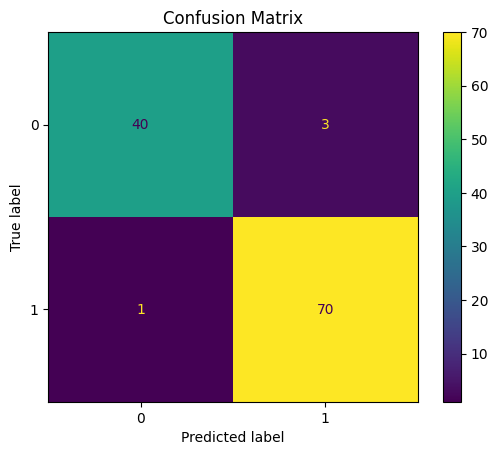

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, rf.predict(X_test))
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()

In [32]:
# Top 5 feature importances
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:5]
print("Top 5 Features:", indices)

Top 5 Features: [23 27  7 20  6]


In [33]:
# Bagging Precision, Recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score
bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-Score: 0.965034965034965


In [34]:
# Program 39: Effect of max_depth
for d in [3, 5, 10, None]:
    rf = RandomForestClassifier(max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    print(f"Accuracy with max_depth={d}:", accuracy_score(y_test, rf.predict(X_test)))

Accuracy with max_depth=3: 0.9649122807017544
Accuracy with max_depth=5: 0.9649122807017544
Accuracy with max_depth=10: 0.9649122807017544
Accuracy with max_depth=None: 0.9649122807017544


In [36]:
# Bagging Regressor with different base estimators
from sklearn.neighbors import KNeighborsRegressor
for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    name = type(base).__name__
    bag = BaggingRegressor(estimator=base, random_state=42)
    bag.fit(X_train, y_train)
    print(f"{name} MSE:", mean_squared_error(y_test, bag.predict(X_test)))

DecisionTreeRegressor MSE: 0.037456140350877194
KNeighborsRegressor MSE: 0.029428070175438595


In [37]:
# ROC-AUC for RF
from sklearn.metrics import roc_auc_score
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

ROC-AUC Score: 0.9952505732066819


In [38]:
# Cross-Validation on Bagging
from sklearn.model_selection import cross_val_score
bag = BaggingClassifier(random_state=42)
scores = cross_val_score(bag, X, y, cv=5)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.92982456 0.93859649 0.97368421 0.93859649 0.97345133]


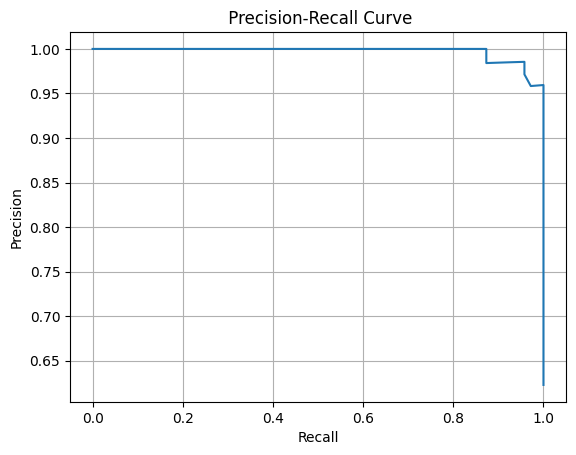

In [39]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_probs = rf.predict_proba(X_test)[:, 1]
prec, rec, _ = precision_recall_curve(y_test, y_probs)
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(" Precision-Recall Curve")
plt.grid(True)
plt.show()

In [41]:
# Bagging Regressor with varied bootstrap samples
for bs in [0.3, 0.5, 1.0]:
    bag = BaggingRegressor(max_samples=bs, random_state=42)
    bag.fit(X_train, y_train)
    print(f"Bootstrap Sample {bs} MSE:", mean_squared_error(y_test, bag.predict(X_test)))


Bootstrap Sample 0.3 MSE: 0.03210526315789474
Bootstrap Sample 0.5 MSE: 0.03798245614035089
Bootstrap Sample 1.0 MSE: 0.037456140350877194
